## Analyse track lengths  
What is the average number of frames in which the same molecule is detected? Only looking at channel 1 here.

In [35]:
import os
import matplotlib.pyplot as plt
import numpy
import os
import shutil
from collections import Counter 

import storm_analysis.sa_library.parameters as parameters

import storm_analysis.daostorm_3d.mufit_analysis as mFit
import storm_analysis.daostorm_3d.z_calibration as zCal
import storm_analysis.sa_library.sa_h5py as saH5Py

# Change directory
os.chdir("D:/gayatri-folder/1_track_length")

In [36]:
if os.path.exists("locs.hdf5"):
    os.remove("locs.hdf5")
    
mFit.analyze("2ch_movie.tif", "locs.hdf5", "analysis_settings.xml")


version 2020.01.07

Peak finding
Frame: 0 0 0
Frame: 50 32 1383
Frame: 100 0 2659
Frame: 150 31 3834
Frame: 200 0 4996
Frame: 250 37 6125
Frame: 300 0 7225
Frame: 350 25 8296
Frame: 400 0 9391
Frame: 450 22 10489
Frame: 500 0 11635
Frame: 550 21 12626
Frame: 600 0 13522
Frame: 650 19 14356
Frame: 700 0 15257
Frame: 750 19 16351
Frame: 800 0 17156
Frame: 850 18 18035
Frame: 900 0 18819
Frame: 950 16 19671
Frame: 1000 0 20583
Frame: 1050 23 21479
Frame: 1100 0 22342
Frame: 1150 24 23170
Frame: 1200 0 23899
Frame: 1250 16 24724
Frame: 1300 0 25554
Frame: 1350 20 26344
Frame: 1400 0 27161
Frame: 1450 19 27969
Frame: 1500 0 28652
Frame: 1550 15 29317
Frame: 1600 0 29977
Frame: 1650 15 30625
Frame: 1700 0 31290
Frame: 1750 14 31888
Frame: 1800 0 32492
Frame: 1850 18 33159
Frame: 1900 0 33807
Frame: 1950 10 34419
Frame: 2000 0 35030
Frame: 2050 16 35639
Frame: 2100 0 36299
Frame: 2150 16 36930
Frame: 2200 0 37617
Frame: 2250 18 38270
Frame: 2300 0 38899
Frame: 2350 16 39549
Frame: 2400 0 401

In [37]:
with saH5Py.SAH5Py('locs.hdf5') as h5:
    # Print total number of tracks in the movie
    print("Total no. of tracks:", h5.getNTracks())

    # Initialize an array of dictionaries for storing frequencies of track_lengths
    # Like how often track length is 1 or 2, and so on
    x = [dict() for t in range(6)]
    f = numpy.arange(1, 5000, 8)
    tl = []
    # Iterate through blocks of tracks. Not sure why there are blocks, but 10,000 tracks are grouped into one block.
    for i,locs in enumerate(h5.tracksIterator()):
        # Each block is a python dictionary of lists.
        for j in range(len(locs['frame_number'])):
            # print(i)
            if locs['frame_number'][j] in f:
                # print('f ', locs['track_length'][j])
                tl.append(locs['track_length'][j])

    track_lengths = (Counter(tl)) # This is a dictionary

Total no. of tracks: 38109


In [38]:
tls=dict()
long_tracks=0
for (k,v) in track_lengths.items():
    if int(k)>4:
        long_tracks+=v
        tls['Long tracks']=long_tracks
    else:
        tls[k]=v
print(tls)

{1: 7378, 2: 1816, 3: 616, 4: 293, 'Long tracks': 406}


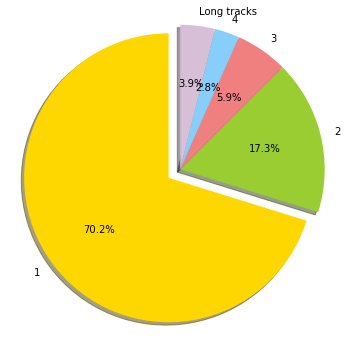

In [42]:
fraction = (1/sum(tls.values()))*100
tls.update((k,v*fraction) for k, v in tls.items())
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'thistle']  
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
plt.figure(figsize = (6,6))
plt.pie(list(tls.values()), explode=explode, labels=tls.keys(), colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
# patches, texts = plt.pie(list(tl.values()), colors=colors, shadow=True, startangle=90)
# plt.legend(patches, tl.keys(), loc= 'lower left')
plt.savefig('piechart_maxgap_0.png') 
plt.axis('equal')
plt.show()